In [75]:
import matplotlib.pyplot as plt
import pandas as pd
import configparser
import os
from pathlib import Path

def parse_experiments(exp_dirs):
    all_data = []

    for exp_dir in exp_dirs:
        exp_dir = Path(exp_dir)
        ini_path = exp_dir / "experiment.ini"
        csv_path = exp_dir / "times.csv"
        # print("ini_path", ini_path, ini_path.is_dir())
        if not ini_path.is_file():
            print("OOPS", ini_path)
            continue

        # --- Parse experiment.ini ---
        config = configparser.ConfigParser()
        config.read(ini_path)

        # First (and only) section
        section = config.sections()[0]
        exp_name = section
        benchmark = config[section].get("benchmark", "")
        datetime = config[section].get("datetime", "")

        # --- Parse times.csv ---
        df = pd.read_csv(csv_path)

        # Keep only the last occurrence of each stage
        df_last = df.groupby("label").tail(1)

        # Collect rows
        for _, row in df_last.iterrows():
            all_data.append({
                "experiment": exp_name,
                "benchmark": benchmark,
                "datetime": datetime,
                "stage": row["label"],
                "runtime": row["td"]
            })

    return pd.DataFrame(all_data)

# Example usage
exp_dirs = [
    "out/embench_iot/md5sum/20250808T145720",
    "out/embench_iot/md5sum/20250808T150040",
    "out/embench_iot/md5sum/20250808T145610",
    "out/embench_iot/xgboost/20250807T135306",
    "out/embench_iot/xgboost/20250808T124228",
    "out/embench_iot/xgboost/20250808T124316",
    "out/embench_iot/depthconv/20250808T132705",
    "out/embench_iot/depthconv/20250806T134321",
    "out/embench_iot/depthconv/20250808T115933",
    "out/embench_iot/depthconv/20250806T142405",
    "out/embench_iot/picojpeg/20250808T083250",
    "out/embench_iot/picojpeg/20250812T103657",
    "out/embench_iot/picojpeg/20250808T110607",
    "out/embench/crc32/20250806T131444",
    "out/embench/primecount/20250808T083402",
    "out/embench/primecount/20250812T072404",
    "/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/qrduino/20250404T223352",
    "/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/qrduino/20250409T151951",
    "/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/qrduino/20250411T025137",
    "/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/qrduino/20250410T003829",
    "/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/qrduino/20250407T173357",
    "/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/qrduino/20250404T231632",
    "/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/qrduino/20250416T133917",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/qrduino/20250404T220348",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/qrduino/20250409T094540",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/sglib-combined/20250405T193246",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/sglib-combined/20250326T140852",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/sglib-combined/20250328T125431",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/picojpeg/20250404T185915",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/picojpeg/20250404T193630",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/picojpeg/20250415T233449",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/picojpeg/20250409T233518",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/picojpeg/20250409T144354",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/picojpeg/20250411T014420",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/picojpeg/20250326T144249",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/picojpeg/20250409T085121",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/aha-mont64/20250415T193231",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/aha-mont64/20250410T190450",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/aha-mont64/20250408T143017",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/aha-mont64/20250408T115249",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/aha-mont64/20250408T115306",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/aha-mont64/20250408T154152",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/aha-mont64/20250408T162231",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/aha-mont64/20250408T164632",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/ud/20250416T100218",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/ud/20250409T193629",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/ud/20250410T012907",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/ud/20250411T034756",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/ud/20250409T111720",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-aes/20250409T124431",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-aes/20250409T223925",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-aes/20250404T094820",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-aes/20250409T073812",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-aes/20250411T013125",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-aes/20250415T220619",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-aes/20250404T105828",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-aes/20250404T101904",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/statemate/20250326T150902",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/statemate/20250405T122655",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/statemate/20250328T122614",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/statemate/20250412T160018",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/wikisort/20250416T120022",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/wikisort/20250410T014753",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/wikisort/20250411T040819",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/wikisort/20250404T200102",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/wikisort/20250404T202405",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/wikisort/20250407T194940",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/wikisort/20250404T210036",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/wikisort/20250409T120857",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/wikisort/20250409T201435",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/huffbench/20250408T202537",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/huffbench/20250404T153112",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/huffbench/20250408T192137",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/huffbench/20250408T180005",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/huffbench/20250406T152736",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/huffbench/20250326T135445",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/huffbench/20250410T235948",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/huffbench/20250408T182946",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/st/20250405T123657",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/st/20250411T032356",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/st/20250409T160905",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/st/20250410T010936",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/st/20250405T102830",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/st/20250409T103848",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/st/20250416T091334",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/st/20250326T145318",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/tarfind/20250404T162517",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/tarfind/20250409T104257",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/tarfind/20250409T172623",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/tarfind/20250404T160412",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/tarfind/20250411T032523",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/tarfind/20250407T175256",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/tarfind/20250416T123902",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/tarfind/20250410T011056",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/tarfind/20250404T170729",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/cubic/20250326T140121",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/cubic/20250405T182642",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/md5sum/20250407T114542",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/md5sum/20250408T211018",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/md5sum/20250404T113750",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/md5sum/20250404T125257",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/md5sum/20250408T215658",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/md5sum/20250415T214340",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/md5sum/20250404T121031",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/md5sum/20250408T223228",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/md5sum/20250411T011136",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nbody/20250408T225016",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nbody/20250408T231650",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nbody/20250411T013022",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nbody/20250409T000933",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nbody/20250405T070327",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nbody/20250405T075406",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nbody/20250405T072239",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nbody/20250407T130241",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/edn/20250408T175950",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/edn/20250404T075727",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/edn/20250415T203147",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/edn/20250410T233358",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/edn/20250408T180526",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/edn/20250404T090411",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/edn/20250408T170156",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/edn/20250329T010114",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/edn/20250408T185904",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/edn/20250404T082439",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/edn/20250408T165919",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nsichneu/20250326T152523",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/matmult-int/20250411T005253",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/matmult-int/20250408T202837",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/matmult-int/20250326T134652",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/matmult-int/20250406T133112",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/matmult-int/20250415T211742",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/matmult-int/20250408T213834",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/minver/20250326T143956",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/minver/20250328T123023",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/minver/20250412T185553",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/minver/20250405T003353",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/crc32/20250404T133523",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/crc32/20250408T162546",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/crc32/20250408T161732",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/crc32/20250410T223344",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/crc32/20250404T145135",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/crc32/20250404T141038",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/crc32/20250415T142136",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/crc32/20250408T183228",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-sha256/20250405T111000",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-sha256/20250411T014404",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-sha256/20250325T140817",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-sha256/20250409T081002",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-sha256/20250411T134910",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-sha256/20250411T082948",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-sha256/20250407T153704",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-sha256/20250415T223953",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-sha256/20250409T230854",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-sha256/20250405T104309",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/nettle-sha256/20250409T132622",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/slre/20250405T183554",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/slre/20250326T143742",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/slre/20250328T120951",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/primecount/20250406T130050",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/primecount/20250411T022849",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/primecount/20250409T145837",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/primecount/20250409T091115",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/primecount/20250416T053249",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/primecount/20250410T001726",
"/mnt/wd8tb_ext4/Data/isaac-demo-out-paper/out/embench/primecount/20250406T123555",
]

exp_dirs = list(map(lambda x: f"../{x}" if x[0] != "/" else x, exp_dirs))

df = parse_experiments(exp_dirs)

print(df.head())



                                      experiment           benchmark  \
0  isaac-demo-embench_iot/md5sum-20250808T145720  embench_iot/md5sum   
1  isaac-demo-embench_iot/md5sum-20250808T145720  embench_iot/md5sum   
2  isaac-demo-embench_iot/md5sum-20250808T145720  embench_iot/md5sum   
3  isaac-demo-embench_iot/md5sum-20250808T145720  embench_iot/md5sum   
4  isaac-demo-embench_iot/md5sum-20250808T145720  embench_iot/md5sum   

          datetime              stage  runtime  
0  20250808T145720            bench_0    3.297  
1  20250808T145720            trace_0    9.198  
2  20250808T145720       isaac_0_load   17.267  
3  20250808T145720    isaac_0_analyze   69.233  
4  20250808T145720  isaac_0_visualize    4.397  


In [97]:
# Map stages
# --- Example mapping dict (extend as needed) ---
stage_mapping = {
    "trace_0": "Tracing",
    "isaac_0_load": "Analysis",
    "isaac_0_analyze": "Analysis",
    "isaac_0_visualize": "Analysis",
    "isaac_0_pick": "Analysis",
    "isaac_0_cdfg": "Analysis",
    "isaac_0_query": "Query/Explore",
    "isaac_0_generate": "Query/Explore",
    "isaac_0_etiss": "Retargeting",
    "seal5_0_splitted": "Retargeting",
    "assign_0_seal5": "Other",
    "hls_0_filtered": "HLS",
    "syn_0_filtered2_selected": "Synthesis",
    "bench_0": "Tracing",
    "assign_0_enc": "Other",
    'etiss_0': "Retargeting",
    'compare_0': "Eval",
    'compare_others_0': "Eval",
    'compare_0_per_instr': "Eval",
    'assign_0_compare_per_instr': "Other",
    'filter_0': "Query/Explore",
    'spec_0_filtered': "Query/Explore",
    'isaac_0_generate_filtered': "Retargeting",
    'isaac_0_etiss_filtered': "Retargeting",
    'assign_0_hls_filtered': "Other",
    'select_0_filtered': "Query/Explore",
    'compare_0_filtered_selected': "Eval",
    'assign_0_compare_filtered_selected': "Other",
    'compare_others_0_filtered_selected': "Eval",
    'assign_0_compare_others_filtered_selected': "Other",
    'retrace_0_filtered_selected': "Analysis",
    'reanalyze_0_filtered_selected': "Analysis",
    'assign_0_util_filtered_selected': "Other",
    'filter_0_filtered_selected': "Query/Explore",
    'score_0_filtered2': "Query/Explore",
    'sort_0_filtered2': "Query/Explore",
    'select_0_filtered2': "Query/Explore",
    'isaac_0_generate_filtered2_selected': "Retargeting",
    'isaac_0_etiss_filtered2_selected': "Retargeting",
    'hls_0_filtered2_selected': "HLS",
    'assign_0_hls_filtered2_selected': "Other",
    'assign_0_syn_filtered2_selected': "Other",
    'filter_0_filtered2_selected': "Query/Explore",
    'score_0_filtered2_selected': "Query/Explore",
    'sort_0_filtered2_selected': "Query/Explore",
    'select_0_filtered2_selected': "Query/Explore",
    'isaac_0_generate_final': "Retargeting",
    'isaac_0_etiss_final': "Retargeting",
    'seal5_0_final': "Retargeting",
    'etiss_0_final': "Retargeting",
    'compare_0_final': "Eval",
    'compare_others_0_final': "Eval",
    'retrace_0_final': "Tracing",
    'reanalyze_0_final': "Analysis",
    'assign_0_enc': "Other",
    'assign_0_seal5': "Other",
    'assign_0_compare_per_instr': "Other",
    'assign_0_hls_filtered': "Other",
    'assign_0_compare_filtered_selected': "Other",
    'assign_0_compare_others_filtered_selected': "Other",
    'assign_0_util_filtered_selected': "Other",
    'assign_0_hls_filtered2_selected': "Other",
    'assign_0_syn_filtered2_selected': "Other",
    'seal5_0': "Retargeting",
    'retrace_0': "Tracing",
    'reanalyze_0': "Analysis",
    'hls_0': "HLS",
    # ... extend ...
}

# Convert to minutes + map to super-stages
df["runtime_min"] = df["runtime"] / 60.0
df["super_stage"] = df["stage"].map(stage_mapping).fillna("Rest")

# Group runtimes per experiment + stage
df_grouped = df.groupby(["experiment", "super_stage"], as_index=False)["runtime_min"].sum()

In [98]:
df_grouped

,experiment,super_stage,runtime_min
0,isaac-demo-embench/aha-mont64-20250408T115249,Tracing,0.055400
1,isaac-demo-embench/aha-mont64-20250408T115306,Analysis,4.304300
2,isaac-demo-embench/aha-mont64-20250408T115306,Eval,2.077450
3,isaac-demo-embench/aha-mont64-20250408T115306,NULL,5.994850
4,isaac-demo-embench/aha-mont64-20250408T115306,Other,0.051600
...,...,...,...
1026,isaac-demo-embench_iot/xgboost-20250808T124316,Other,0.099950
1027,isaac-demo-embench_iot/xgboost-20250808T124316,Query/Explore,0.684500
1028,isaac-demo-embench_iot/xgboost-20250808T124316,Retargeting,9.149117
1029,isaac-demo-embench_iot/xgboost-20250808T124316,Synthesis,2.644633


In [99]:
# Remove experiments which did not run hls stage at least once
experiments_with_hls = df_grouped.loc[df_grouped['super_stage'] == 'HLS', 'experiment'].unique()

# Keep only rows for these experiments
df_grouped = df_grouped[df_grouped['experiment'].isin(experiments_with_hls)]
# len(df_grouped), len(df_grouped_)

In [100]:
%pwd

'/work/git/students/tuw/michael/isaac-demo/ipynb'

/tmp/ipykernel_3587619/220580754.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_grouped["exp_id"] = df_grouped["experiment"].map(exp_ids)


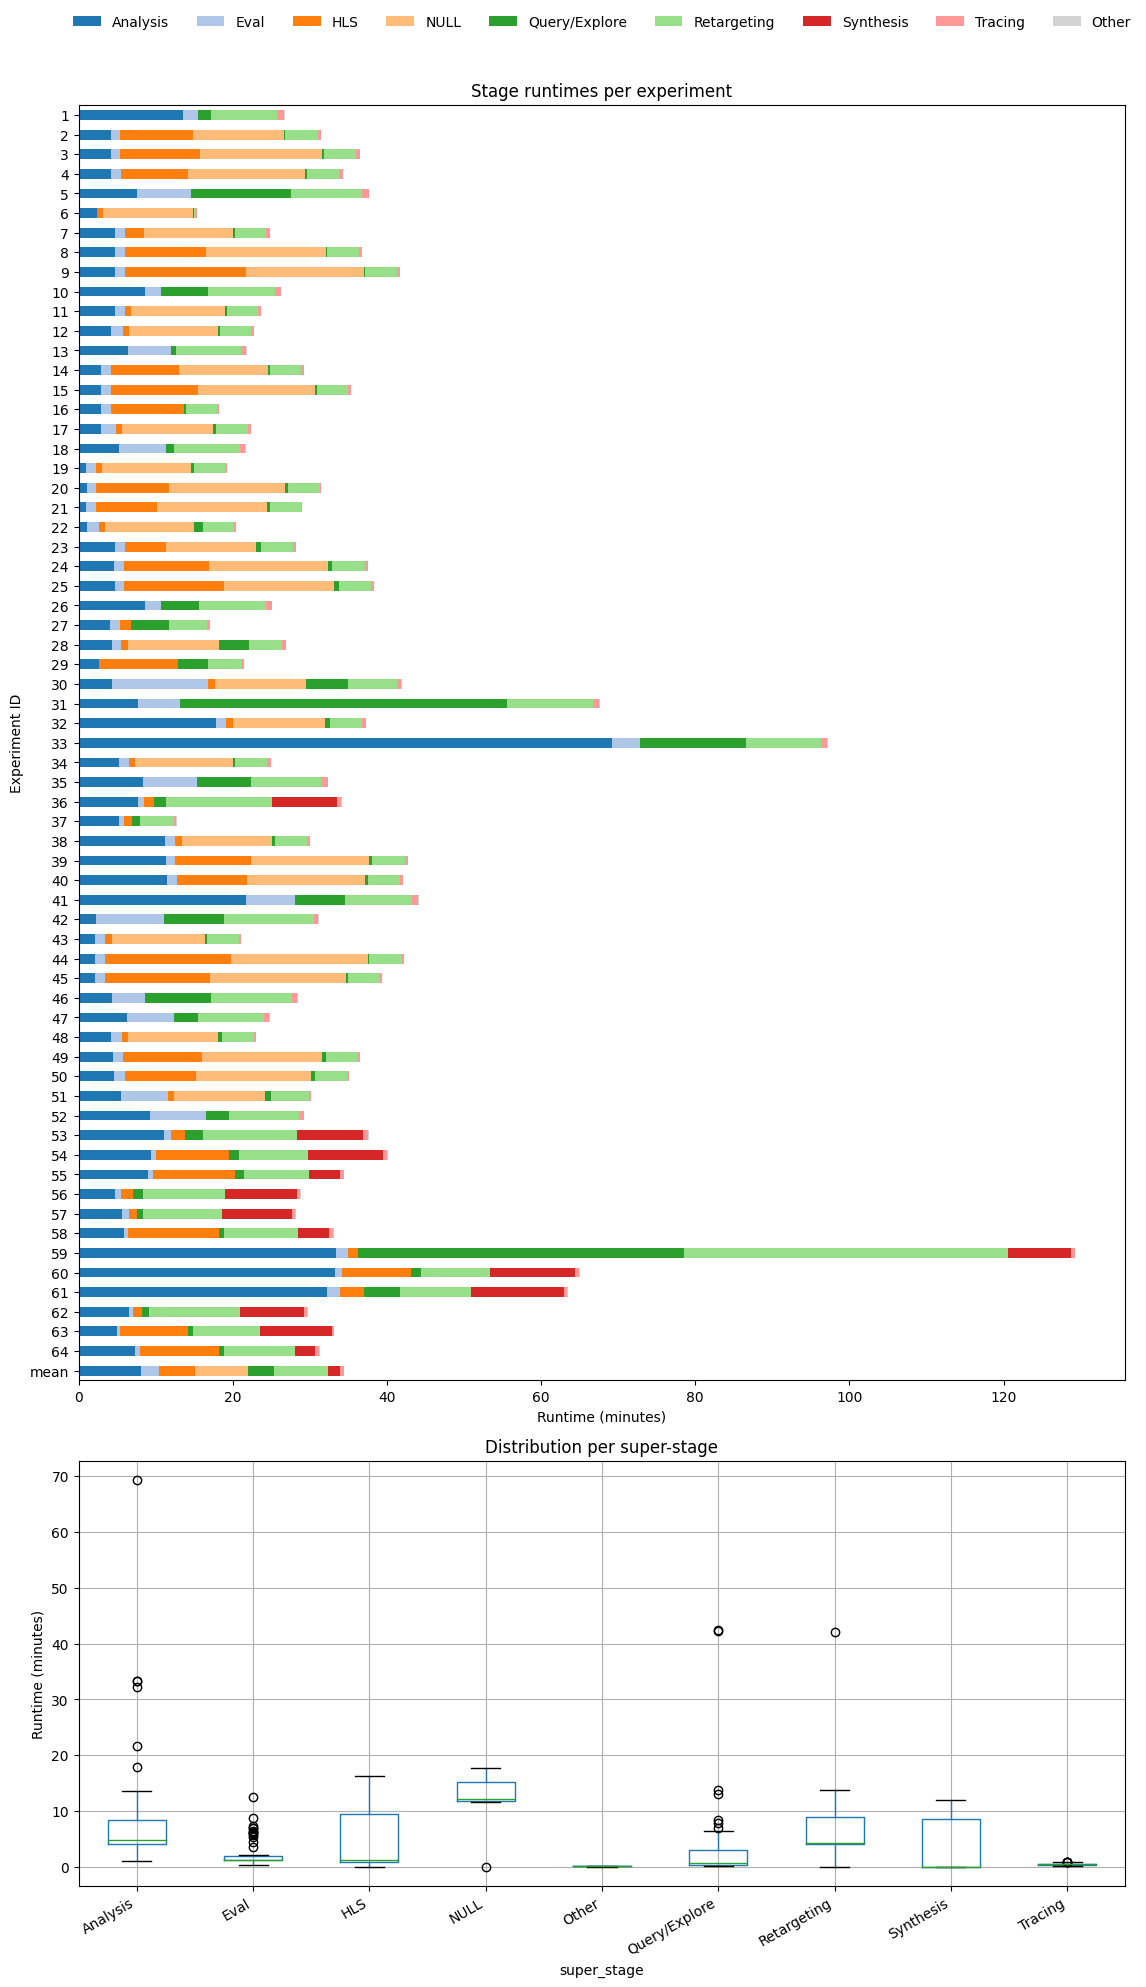

In [103]:
# Assign numeric experiment IDs for plotting
exp_ids = {exp: i+1 for i, exp in enumerate(df_grouped["experiment"].unique())}
df_grouped["exp_id"] = df_grouped["experiment"].map(exp_ids)

# Pivot for stacked bar
df_wide = df_grouped.pivot(index="exp_id", columns="super_stage", values="runtime_min").fillna(0)
df_wide.loc["mean"] = df_wide.mean()

# Reorder columns so that "Other" is last if it exists
cols = [c for c in df_wide.columns if c != "Other"]
if "Other" in df_wide.columns:
    cols.append("Other")
df_wide = df_wide[cols]

# Build color map: tab20 for regular stages, gray for "Other"
base_colors = list(plt.cm.tab20.colors)
color_cycle = base_colors * ((len(cols) - 1) // len(base_colors) + 1)  # repeat if needed
stage_colors = dict(zip(cols, color_cycle))
if "Other" in cols:
    stage_colors["Other"] = "lightgray"



# --- Plot ---
fig, axes = plt.subplots(2, 1, figsize=(12, 20), gridspec_kw={'height_ratios': [3, 1]})

# (1) Stacked horizontal bar per experiment
# Plot stacked horizontal bars
df_wide.plot(
    kind="barh", stacked=True, ax=axes[0],
    color=[stage_colors[c] for c in cols]
)
axes[0].set_xlabel("Runtime (minutes)")
axes[0].set_ylabel("Experiment ID")
axes[0].set_title("Stage runtimes per experiment")
axes[0].invert_yaxis()  # so experiment 1 is at top
axes[0].legend(
    loc="lower center", 
    bbox_to_anchor=(0.5, 1.05), 
    ncol=len(df_wide.columns), 
    frameon=False
)

# (2) Boxplots per super-stage
df_grouped.boxplot(column="runtime_min", by="super_stage", ax=axes[1])
axes[1].set_ylabel("Runtime (minutes)")
axes[1].set_title("Distribution per super-stage")
axes[1].set_xticklabels(axes[1].get_xticklabels(), rotation=30, ha="right")

plt.suptitle("")
plt.tight_layout()
plt.show()


In [102]:
df[df["super_stage"] == "Rest"]["stage"].unique()

array([], dtype=object)

In [89]:
df_grouped.groupby("exp_id")["experiment"].first()

exp_id
1        isaac-demo-embench/aha-mont64-20250408T162231
2        isaac-demo-embench/aha-mont64-20250415T193231
3             isaac-demo-embench/crc32-20250408T162546
4             isaac-demo-embench/crc32-20250415T142136
5               isaac-demo-embench/edn-20250404T090411
6               isaac-demo-embench/edn-20250408T180526
7         isaac-demo-embench/huffbench-20250408T180005
8         isaac-demo-embench/huffbench-20250408T202537
9       isaac-demo-embench/matmult-int-20250415T211742
10           isaac-demo-embench/md5sum-20250404T121031
11           isaac-demo-embench/md5sum-20250408T223228
12           isaac-demo-embench/md5sum-20250415T214340
13            isaac-demo-embench/nbody-20250407T130241
14            isaac-demo-embench/nbody-20250409T000933
15       isaac-demo-embench/nettle-aes-20250411T013125
16    isaac-demo-embench/nettle-sha256-20250325T140817
17    isaac-demo-embench/nettle-sha256-20250407T153704
18    isaac-demo-embench/nettle-sha256-20250411T082948
19 

In [73]:
df_wide

super_stage,Analysis,Eval,HLS,Query/Explore,Retargeting,Synthesis,Tracing,Other
exp_id,,,,,,,,
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.055400,0.000000
2,4.304300,2.077450,0.000000,0.941717,4.511117,0.000000,0.336517,6.046450
3,7.864717,3.324050,0.000000,0.817233,8.649467,0.000000,0.599233,13.799067
4,7.855750,3.223717,0.000000,0.813983,8.797533,0.000000,0.594133,13.740900
5,9.349867,3.565750,0.000000,0.729600,9.755650,0.000000,0.721783,26.340633
...,...,...,...,...,...,...,...,...
162,32.174100,1.774717,3.019317,4.692100,9.251350,11.999917,0.491750,0.115200
163,6.477200,0.563550,1.114000,0.926850,11.883633,8.229617,0.435867,0.076150
164,4.940217,0.406517,8.869667,0.595433,8.775350,9.251683,0.253483,0.080117
